In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Snippet to manually access the data from GDrive and upload it in the Colab
file_id = "1_h2_aYjQ1ZldUxGConuXFw_TvIu-1N1g" #@param {type:"string"}
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html


from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

# Replace the assignment below with your file ID
# to download a different file.
#
# A file ID looks like: 1gLBqEWEBQDYbKCDigHnUXNTkzl-OslSO

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

fileId = drive.CreateFile({'id': file_id }) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])
fileId.GetContentFile(fileId['title'])  # Save Drive file as a local file

!unzip {fileId['title']}

netflix.zip
Archive:  netflix.zip
  inflating: netflix.csv             


In [ ]:
# Load your dataset
df = pd.read_csv('netflix.csv')
df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df=df.set_index('date')
df.head()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,year
date,,,,,,,,,,,,,,,,,,,,
2014-01-02,52.401428,52.511429,51.542858,51.831429,12325600,34.729664,49.183584,-89.573201,-131.288579,50.112828,50.235157,46.385428,46.650698,0.751929,52.607357,1.052857,1.161182,1.247748,51.871429,2014
2014-01-03,52.000000,52.495712,51.842857,51.871429,10817100,35.587886,49.457208,-65.820581,-103.026189,50.228771,50.299327,46.537571,46.754726,0.624259,52.656143,0.664283,1.090197,1.206072,51.367142,2014
2014-01-06,51.889999,52.044285,50.475716,51.367142,15501500,29.820674,46.087900,-121.472559,-139.640566,50.312571,50.341203,46.680971,46.846621,0.476890,52.666928,1.568569,1.158535,1.231965,48.500000,2014
2014-01-07,49.684284,49.698570,48.152859,48.500000,36167600,14.371863,32.522091,-206.762171,-238.029120,50.336228,50.268997,46.791957,46.879558,0.127277,52.560214,3.214283,1.452214,1.373559,48.712856,2014
2014-01-08,48.104286,49.425713,48.074287,48.712856,20001100,18.049045,34.073549,-117.836707,-180.766801,50.373257,50.207969,46.917071,46.916075,-0.131106,52.455357,1.351426,1.437815,1.371978,48.150002,2014


**Preprocessing of Dataset**

In [ ]:
# Show and decsribe the whole dataset
df.describe

<bound method NDFrame.describe of                   open        high         low       close    volume  \
date                                                                   
2014-01-02   52.401428   52.511429   51.542858   51.831429  12325600   
2014-01-03   52.000000   52.495712   51.842857   51.871429  10817100   
2014-01-06   51.889999   52.044285   50.475716   51.367142  15501500   
2014-01-07   49.684284   49.698570   48.152859   48.500000  36167600   
2014-01-08   48.104286   49.425713   48.074287   48.712856  20001100   
...                ...         ...         ...         ...       ...   
2023-12-22  494.000000  496.019989  485.450012  486.760010   2701100   
2023-12-26  489.390015  491.480011  486.380005  491.190002   2034500   
2023-12-27  491.239990  494.019989  489.250000  491.790009   2561300   
2023-12-28  492.000000  492.890015  489.070007  490.510010   1710500   
2023-12-29  490.369995  492.230011  481.940002  486.880005   2739500   

                rsi_7     rsi_14       cci_7      cci_14      sma_50  \
date                                                                   
2014-01-02  34.729664  49.183584  -89.573201 -131.288579   50.112828   
2014-01-03  35.587886  49.457208  -65.820581 -103.026189   50.228771   
2014-01-06  29.820674  46.087900 -121.472559 -139.640566   50.312571   
2014-01-07  14.371863  32.522091 -206.762171 -238.029120   50.336228   
2014-01-08  18.049045  34.073549 -117.836707 -180.766801   50.373257   
...               ...        ...         ...         ...         ...   
2023-12-22  61.286700  62.629263   42.406864   87.904519  443.339799   
2023-12-26  65.324458  64.613544   31.476352   76.722042  446.049999   
2023-12-27  65.886676  64.885498   54.412289   74.696489  448.669399   
2023-12-28  63.331047  63.759744  -14.020755   61.870371  451.365199   
2023-12-29  56.127883  60.551251 -157.815293   32.706720  454.178999   

                ema_50     sma_100     ema_100       macd   bollinger  \
date                                                                    
2014-01-02   50.235157   46.385428   46.650698   0.751929   52.607357   
2014-01-03   50.299327   46.537571   46.754726   0.624259   52.656143   
2014-01-06   50.341203   46.680971   46.846621   0.476890   52.666928   
2014-01-07   50.268997   46.791957   46.879558   0.127277   52.560214   
2014-01-08   50.207969   46.917071   46.916075  -0.131106   52.455357   
...                ...         ...         ...        ...         ...   
2023-12-22  451.651874  425.729399  432.159056  11.455084  471.507500   
2023-12-26  453.202389  426.331299  433.327986  11.575034  472.108499   
2023-12-27  454.715629  426.933199  434.485650  11.584966  472.748000   
2023-12-28  456.119330  427.430699  435.595043  11.358617  473.414000   
2023-12-29  457.325631  427.916499  436.610587  10.762262  474.059500   

            TrueRange      atr_7     atr_14  next_day_close  year  
date                                                               
2014-01-02   1.052857   1.161182   1.247748       51.871429  2014  
2014-01-03   0.664283   1.090197   1.206072       51.367142  2014  
2014-01-06   1.568569   1.158535   1.231965       48.500000  2014  
2014-01-07   3.214283   1.452214   1.373559       48.712856  2014  
2014-01-08   1.351426   1.437815   1.371978       48.150002  2014  
...               ...        ...        ...             ...   ...  
2023-12-22  10.569977  11.260790  10.724453      491.190002  2023  
2023-12-26   5.100006  10.380678  10.322707      491.790009  2023  
2023-12-27   4.769989   9.579151   9.926084      490.510010  2023  
2023-12-28   3.820008   8.756417   9.489936      486.880005  2023  
2023-12-29  10.290009   8.975501   9.547084      468.500000  2023  

[2516 rows x 20 columns]>

In [ ]:
# Descriptive statistics of close and volume
print(df[['close', 'volume', 'rsi_14', 'ema_100']].describe())

             close        volume       rsi_14      ema_100
count  2516.000000  2.516000e+03  2516.000000  2516.000000
mean    274.487023  1.049230e+07    53.424079   266.813442
std     165.902954  9.173072e+06    13.088270   161.050027
min      44.887142  1.144000e+06     9.152344    46.650698
25%     110.064998  5.017050e+06    43.731175   102.490532
50%     288.229995  7.795950e+06    53.668026   291.379066
75%     384.560005  1.299060e+07    63.378696   369.343945
max     691.690002  1.333875e+08    91.547868   610.750059


In [ ]:
# Shows the maximum rows and columns
df.shape

(2516, 20)

In [ ]:
# Check for the null in the variables
df.isnull().sum().any()

False

In [ ]:
# Check for the duplicates in the variables
df.duplicated().values.any()

False

## **Univariate Analysis of Close Price, Next Day Close, Open Price, and EMA over 100 days**

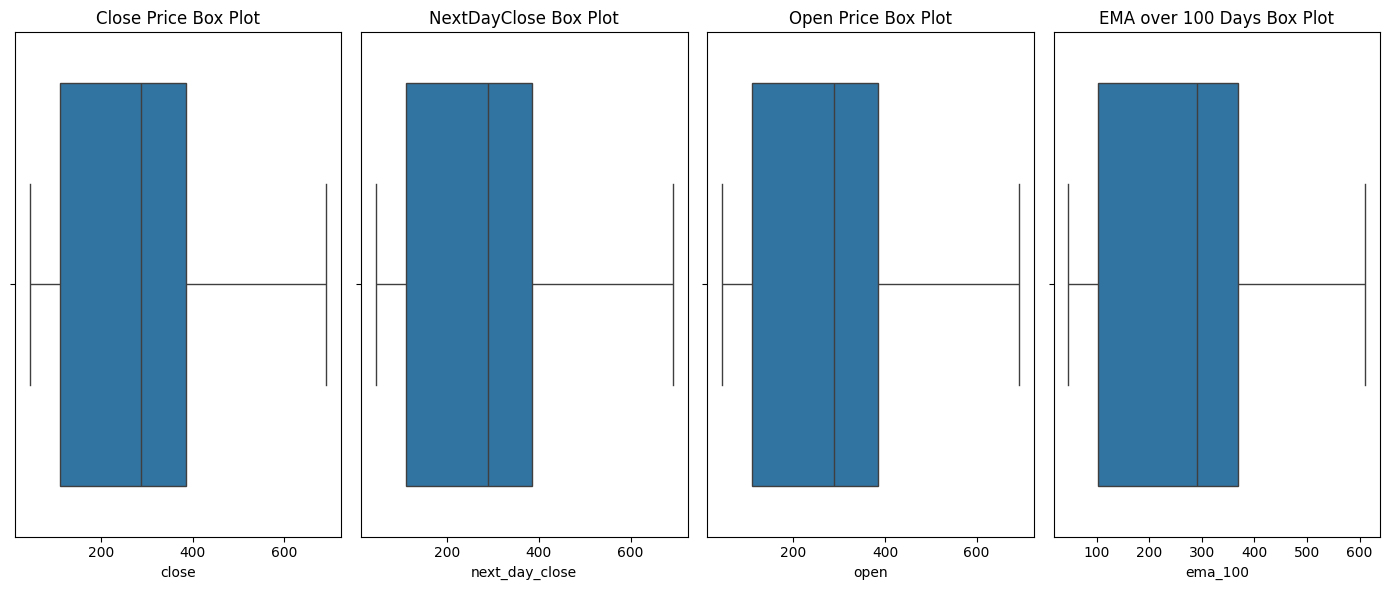

In [ ]:
# Box plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 4, 1)  # 1 row, 4 columns, 1st plot
sns.boxplot(x=df['close'], orient='h')
plt.title('Close Price Box Plot')

plt.subplot(1, 4, 2)  # 1 row, 4 columns, 2nd plot
sns.boxplot(x=df['next_day_close'], orient='h')
plt.title('NextDayClose Box Plot')

plt.subplot(1, 4, 3)  # 1 row, 4 columns, 3rd plot
sns.boxplot(x=df['open'], orient='h')
plt.title('Open Price Box Plot')

plt.subplot(1, 4, 4)  # 1 row, 4 columns, 4th plot
sns.boxplot(x=df['ema_100'], orient='h')
plt.title('EMA over 100 Days Box Plot')

plt.tight_layout()  # Adjusts subplot params so that the subplots fit into the figure area
plt.show()


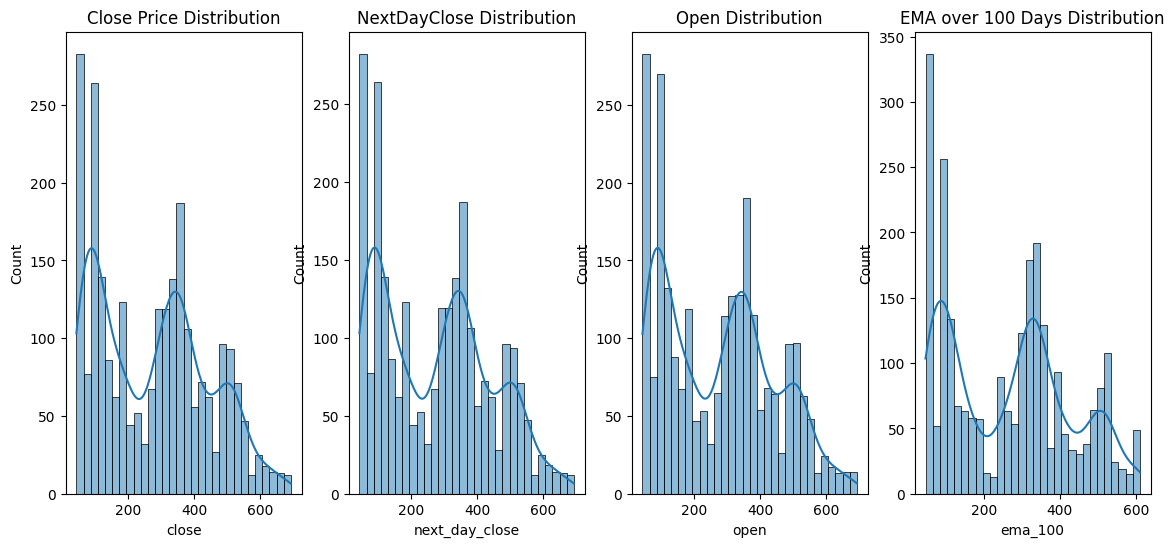

In [ ]:
# Plotting distribution of 'close' price, 'next_day_close', 'open' price, and 'ema_100'
plt.figure(figsize=(14, 6))

# Create the first subplot for 'close' price distribution
plt.subplot(1, 4, 1)  # 1 row, 4 columns, first subplot
sns.histplot(df['close'], kde=True, bins=30)  # Plot histogram with kernel density estimate (KDE)
plt.title('Close Price Distribution')

# Create the second subplot for 'next_day_close' distribution
plt.subplot(1, 4, 2)  # 1 row, 4 columns, second subplot
sns.histplot(df['next_day_close'], kde=True, bins=30)  # Plot histogram with kernel density estimate (KDE)
plt.title('NextDayClose Distribution')

# Create the third subplot for 'rsi_14' distribution
plt.subplot(1, 4, 3)  # 1 row, 4 columns, third subplot
sns.histplot(df['open'], kde=True, bins=30)  # Plot histogram with kernel density estimate (KDE)
plt.title('Open Distribution')

# Create the fourth subplot for 'ema_100' distribution
plt.subplot(1, 4, 4)  # 1 row, 4 columns, fourth subplot
sns.histplot(df['ema_100'], kde=True, bins=30)  # Plot histogram with kernel density estimate (KDE)
plt.title('EMA over 100 Days Distribution')

# Display the plots
plt.show()

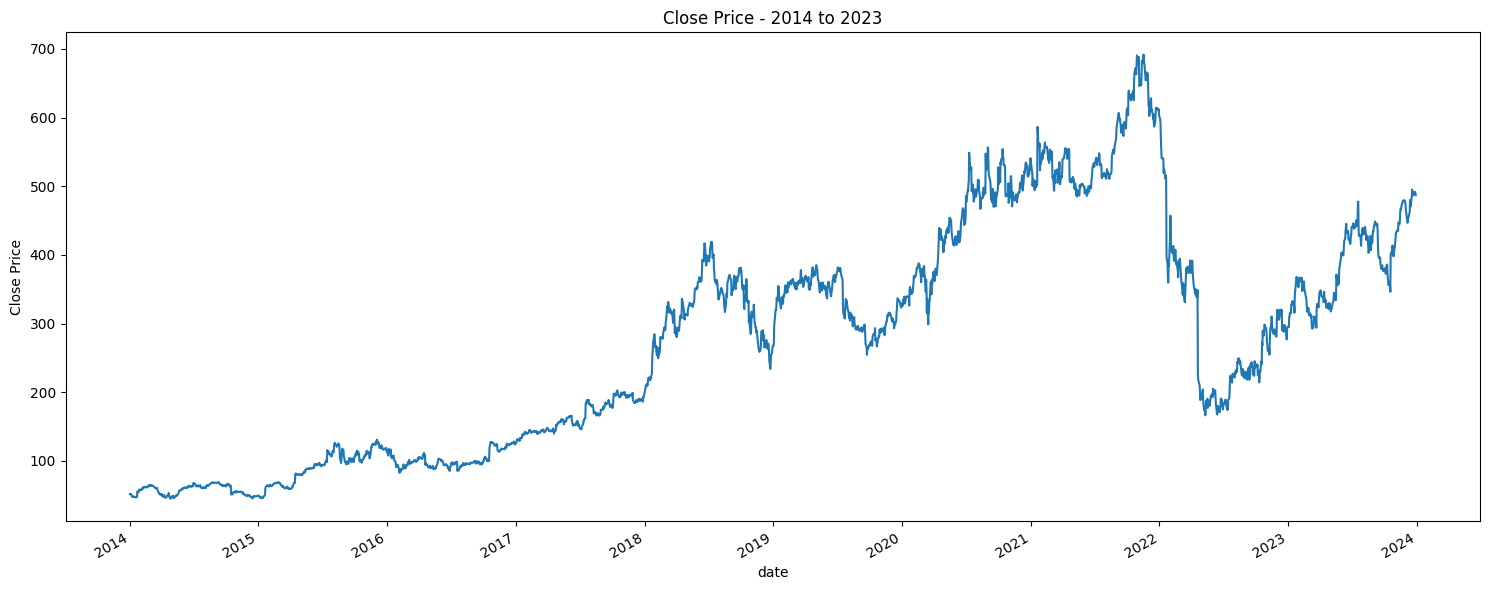

In [ ]:
# Plot Close Price Over Time
plt.figure(figsize=(15, 6))
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title(f"Close Price - 2014 to 2023")
df['close'].plot()
plt.tight_layout()

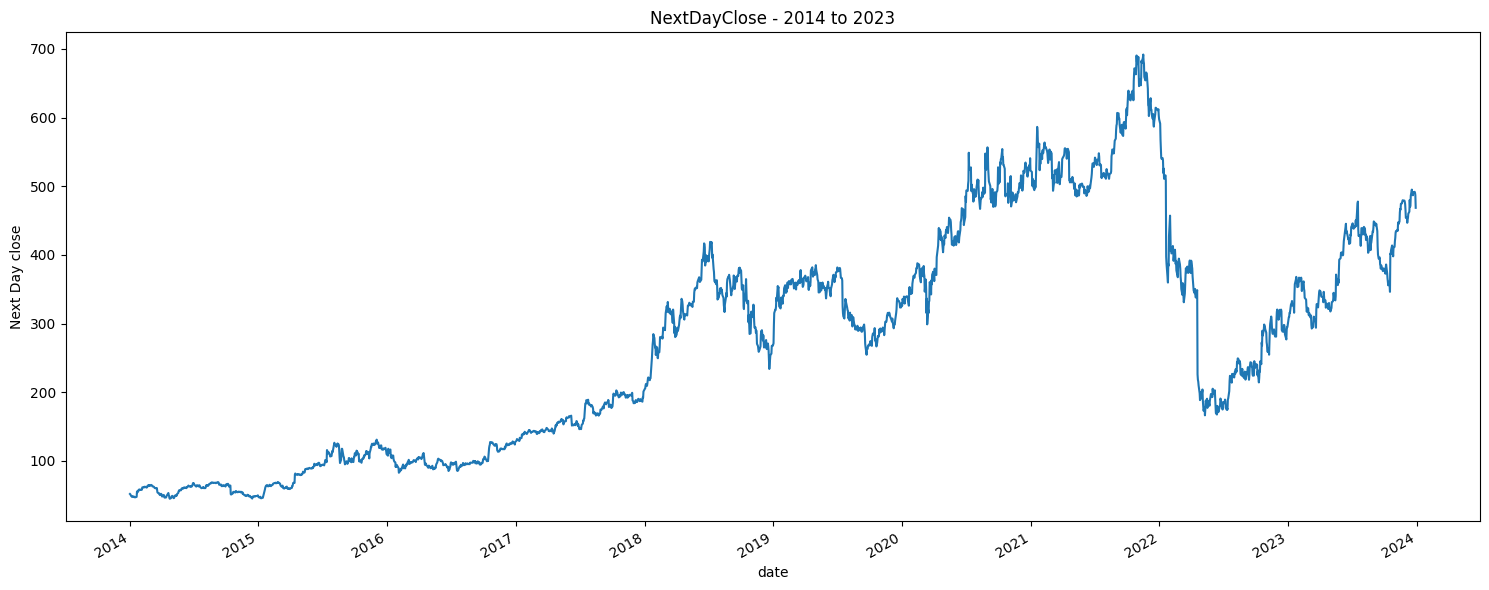

In [ ]:
# Plot Next Day Close Price Over Time
plt.figure(figsize=(15, 6))
plt.ylabel('Next Day close')
plt.xlabel('Date')
plt.title(f"NextDayClose - 2014 to 2023")
df['next_day_close'].plot()
plt.tight_layout()

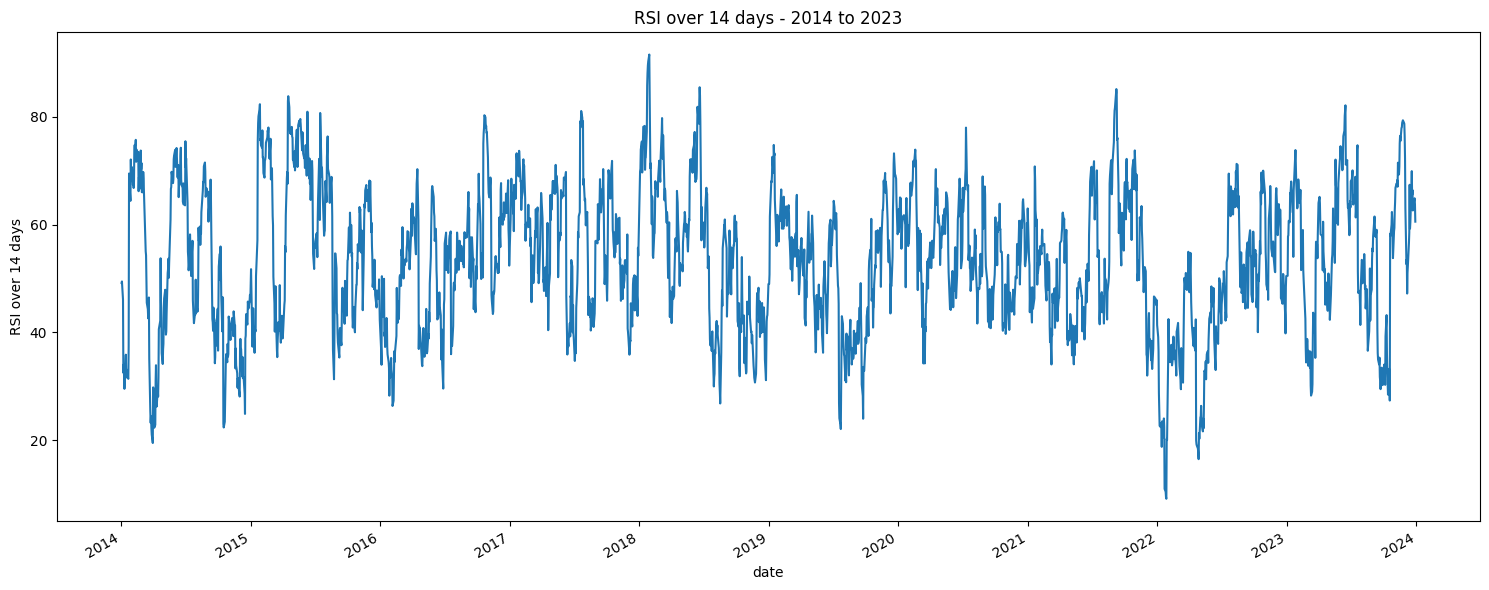

In [ ]:
# Plot rsi_14 Over Time
plt.figure(figsize=(15, 6))
plt.ylabel('RSI over 14 days')
plt.xlabel('Date')
plt.title(f"RSI over 14 days - 2014 to 2023")
df['rsi_14'].plot()
plt.tight_layout()

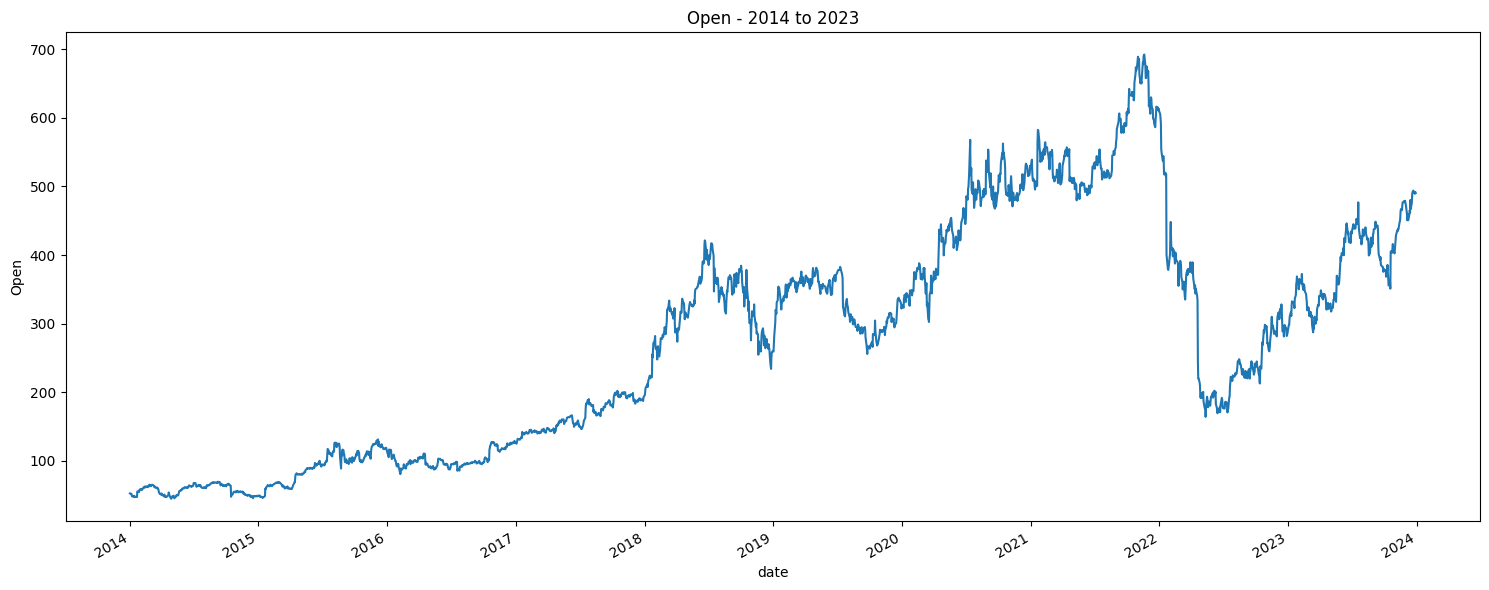

In [ ]:
# Plot open Over Time
plt.figure(figsize=(15, 6))
plt.ylabel('Open')
plt.xlabel('Date')
plt.title(f"Open - 2014 to 2023")
df['open'].plot()
plt.tight_layout()

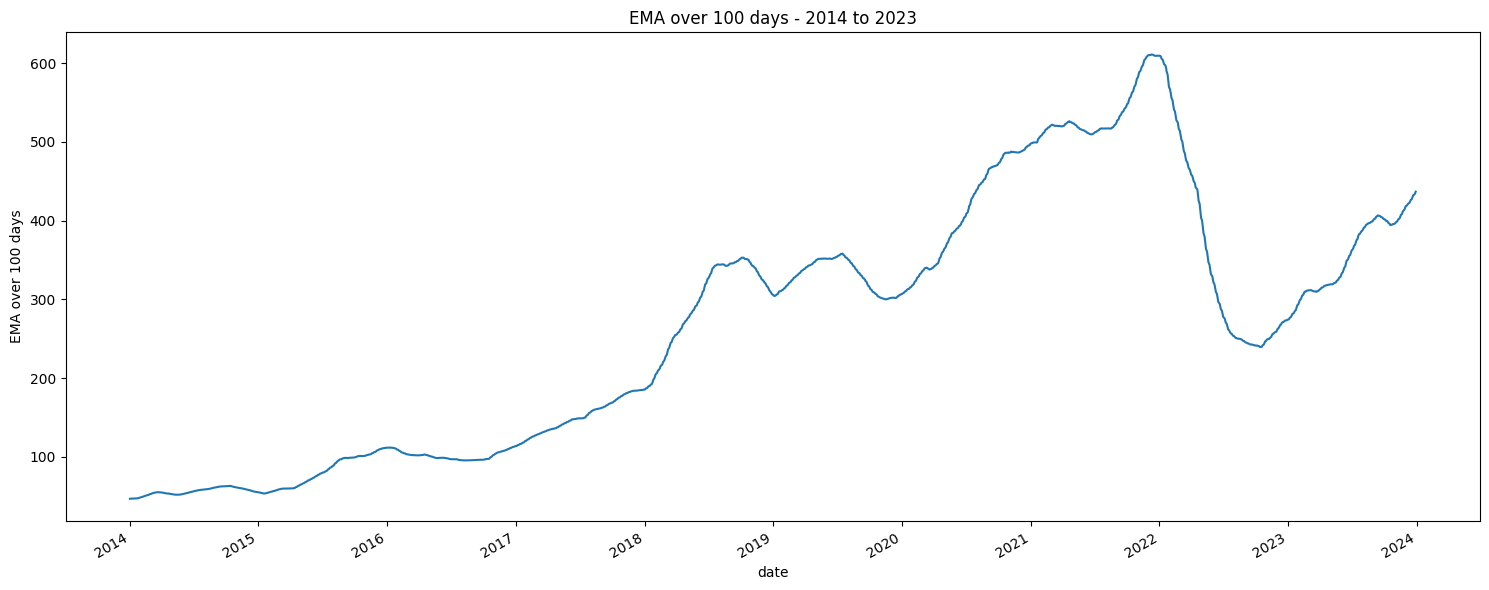

In [ ]:
# Plot ema_100 Over Time
plt.figure(figsize=(15, 6))
plt.ylabel('EMA over 100 days')
plt.xlabel('Date')
plt.title(f"EMA over 100 days - 2014 to 2023")
df['ema_100'].plot()
plt.tight_layout()

## **Bivariate Analysis of Close and NextDayClose**

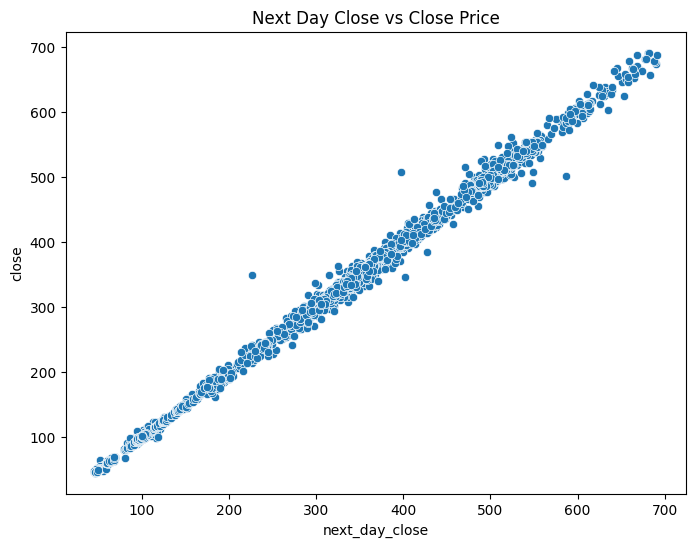

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='next_day_close', y='close', data=df)
plt.title('Next Day Close vs Close Price')
plt.show()

In [ ]:
# Correlation
correlation = df['close'].corr(df['next_day_close'])
print(f'Correlation between close and next_day_close: {correlation}')

Correlation between close and next_day_close: 0.9986724046838912


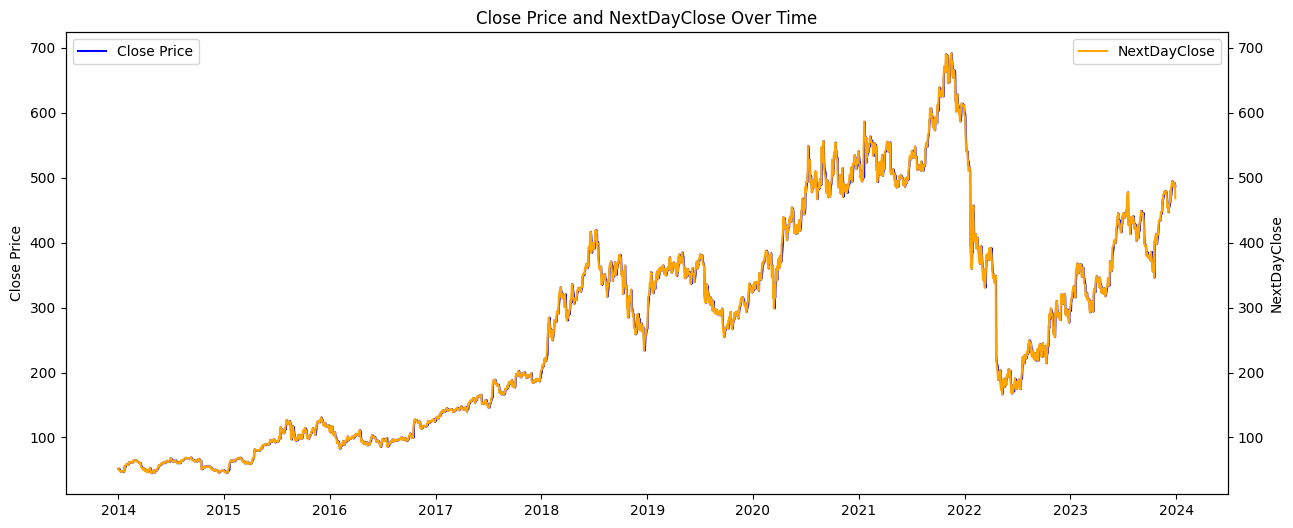

In [ ]:
# Time Series Correlation
# Plotting
plt.figure(figsize=(15, 6))  # Set the figure size

# Create a secondary y-axis to plot next_day_close
ax1 = plt.gca()  # Get current axes
ax2 = ax1.twinx()  # Create a secondary y-axis

# Plot 'close' price on the primary y-axis
ax1.plot(df.index, df['close'], label='Close Price', color='blue')

# Plot 'next_day_close' on the secondary y-axis
ax2.plot(df.index, df['next_day_close'], label='NextDayClose', color='orange')

# Set titles and labels
ax1.set_title('Close Price and NextDayClose Over Time')
ax1.set_ylabel('Close Price')
ax2.set_ylabel('NextDayClose')

# Add legends to the plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

## **Bivariate Analysis of Close and Open Price**

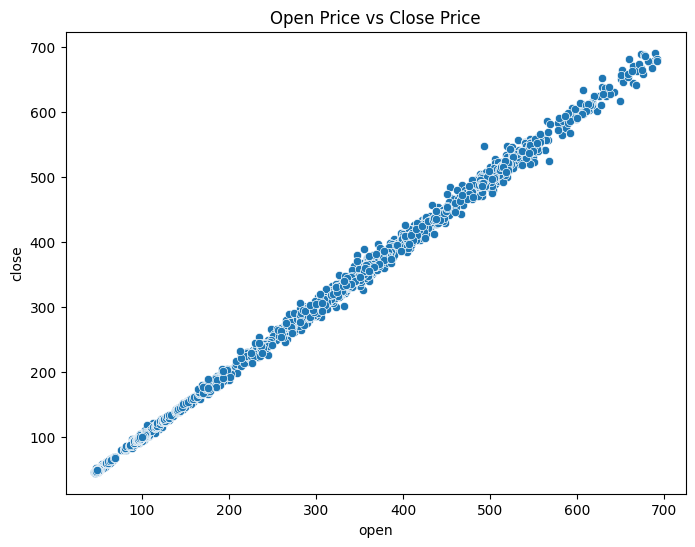

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='open', y='close', data=df)
plt.title('Open Price vs Close Price')
plt.show()

In [ ]:
# Correlation
correlation = df['close'].corr(df['open'])
print(f'Correlation between close price and open price: {correlation}')

Correlation between close price and open price: 0.9992394977856803


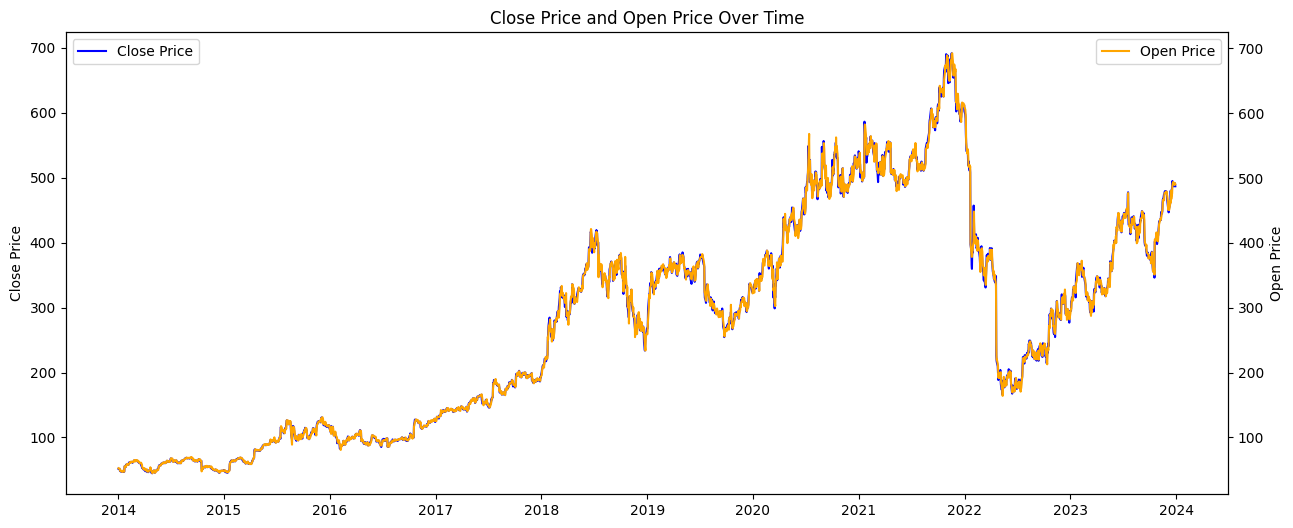

In [ ]:
# Time Series Correlation
# Plotting
plt.figure(figsize=(15, 6))  # Set the figure size

# Create a secondary y-axis to plot open
ax1 = plt.gca()  # Get current axes
ax2 = ax1.twinx()  # Create a secondary y-axis

# Plot 'close' price on the primary y-axis
ax1.plot(df.index, df['close'], label='Close Price', color='blue')

# Plot 'open' on the secondary y-axis
ax2.plot(df.index, df['open'], label='Open Price', color='orange')

# Set titles and labels
ax1.set_title('Close Price and Open Price Over Time')
ax1.set_ylabel('Close Price')
ax2.set_ylabel('Open Price')

# Add legends to the plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

## **Bivariate Analysis of Close and EMA over 100 days**

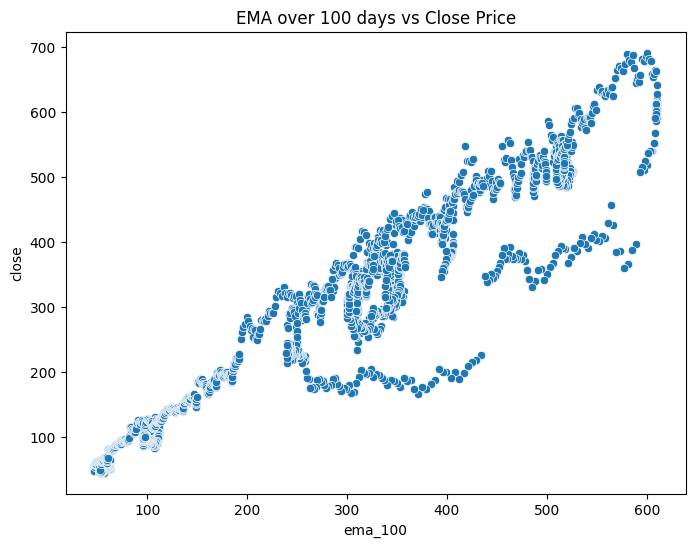

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ema_100', y='close', data=df)
plt.title('EMA over 100 days vs Close Price')
plt.show()

In [ ]:
# Correlation
correlation = df['close'].corr(df['ema_100'])
print(f'Correlation between close and ema_100: {correlation}')

Correlation between close and ema_100: 0.9642554624429747


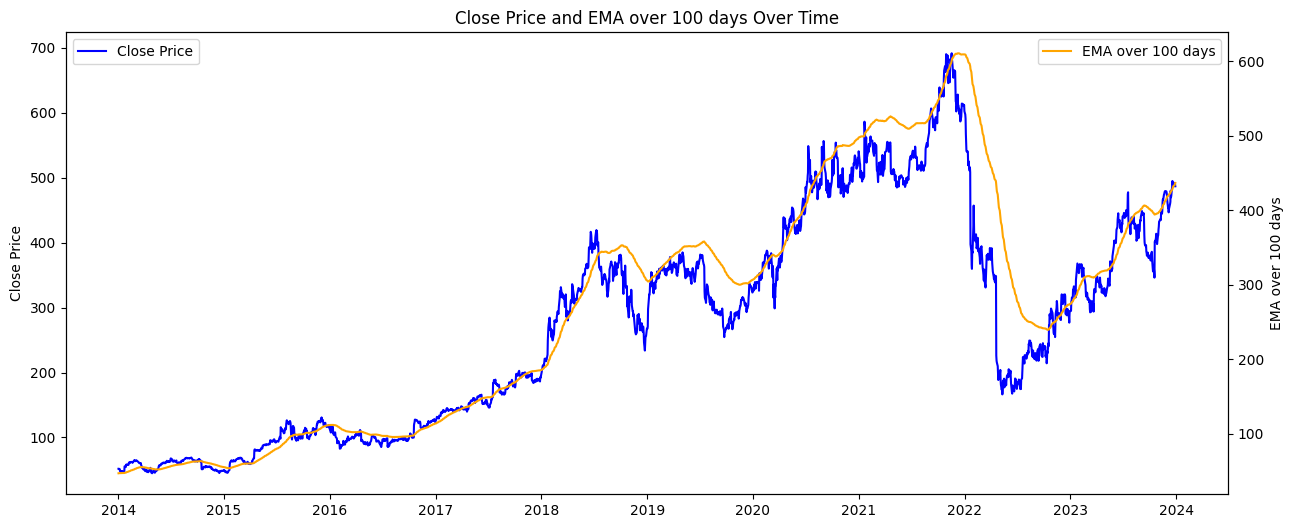

In [ ]:
# Time Series Correlation
# Plotting
plt.figure(figsize=(15, 6))  # Set the figure size

# Create a secondary y-axis to plot ema_100
ax1 = plt.gca()  # Get current axes
ax2 = ax1.twinx()  # Create a secondary y-axis

# Plot 'close' price on the primary y-axis
ax1.plot(df.index, df['close'], label='Close Price', color='blue')

# Plot 'ema_100' on the secondary y-axis
ax2.plot(df.index, df['ema_100'], label='EMA over 100 days', color='orange')

# Set titles and labels
ax1.set_title('Close Price and EMA over 100 days Over Time')
ax1.set_ylabel('Close Price')
ax2.set_ylabel('EMA over 100 days')

# Add legends to the plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

## **Creating Linear Regression Model to predict Close Variable**

In [ ]:
# creating the needed variables

x = df[['open', 'volume', 'low']] # these are the inputs that can be changed in order to minimze the MSA but make sure to not overfit
y = df['close'] # what we want to predict

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0) # random state to 0 to see how well a model generalizes to new data.

In [ ]:
print(x_train.shape, y_train.shape) # to see the percentage of splitting, test and train

(2012, 3) (2012,)


In [ ]:
# Linear regression implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(LR.coef_)
print(LR.intercept_)

[-1.21498084e-01  1.46107395e-07  1.13993178e+00]
-1.6606504331591623


In [ ]:
# printing the predicted value
predicted = LR.predict(x_test)
print(x_test)
print(predicted)

                  open    volume         low
date                                        
2017-05-04  155.589996   5582300  154.550003
2019-01-10  314.570007  13472500  312.500000
2016-04-15  110.639999  11746100  109.779999
2017-10-02  182.110001   7342000  176.580002
2023-01-17  331.079987   9247000  323.600006
...                ...       ...         ...
2021-01-04  539.000000   4444400  515.090027
2014-10-09   66.661430  14928200   65.651428
2014-10-02   62.700001  18450600   62.554287
2023-05-30  397.480011  10865000  385.790009
2016-11-25  117.639999   1616300  117.180000

[504 rows x 3 columns]
[156.42753917 318.31681093 111.7547039  178.57521063 328.34675284
 176.22518369 185.82557732 489.39622813 298.62216439 403.53848956
  81.76296218 219.37565494  61.487486   104.11424355 100.53763077
  73.10291893 505.6396216   95.26317568 485.85891054 361.69995745
 303.56136958 514.11023439 406.35070284 366.12291702 100.27172257
 155.35310588  61.47088223  93.53396496 368.95300882 258.4213

In [ ]:
print(y_test.shape)
print(predicted.shape)

(504,)
(504,)


In [ ]:
# Calculating the accuracy of the model
print("Model Accuracy:", LR.score(x_test, y_test))

Model Accuracy: 0.9992524817801824


In [ ]:
frame = pd.DataFrame({'Actual Value': y_test, "Predicted": predicted})
print(frame)

            Actual Value   Predicted
date                                
2017-05-04    157.250000  156.427539
2019-01-10    324.660004  318.316811
2016-04-15    111.510002  111.754704
2017-10-02    177.009995  178.575211
2023-01-17    326.220001  328.346753
...                  ...         ...
2021-01-04    522.859985  520.668736
2014-10-09     65.945717   67.259383
2014-10-02     64.282860   64.724809
2023-05-30    392.980011  391.408040
2016-11-25    117.410004  117.859675

[504 rows x 2 columns]


In [ ]:
LR.score(x_train, y_train)

0.9993584699489323

In [ ]:
LR.score(x_test, y_test)

0.9992524817801824

In [ ]:
import math
from sklearn import metrics

# Mean Error indicates whether the model needs more adjustment of input, avoid overfitting, more inputs does not mean better result
print("Mean Absolute Error", metrics.mean_absolute_error(y_test, predicted))
print("Mean Square Error", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error", math.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("R-squared", metrics.r2_score(y_test, predicted))


Mean Absolute Error 2.681847535862887
Mean Square Error 20.471094605062575
Root Mean Error 4.524499376181035
R-squared 0.9992524817801824


In [ ]:
# # Showing the predicted results and that will be passed on plotting later
predicted = LR.predict(x)
print(predicted)


[ 52.52887986  52.69922799  51.8385709  ... 496.74048238 496.31865471
 488.53932238]


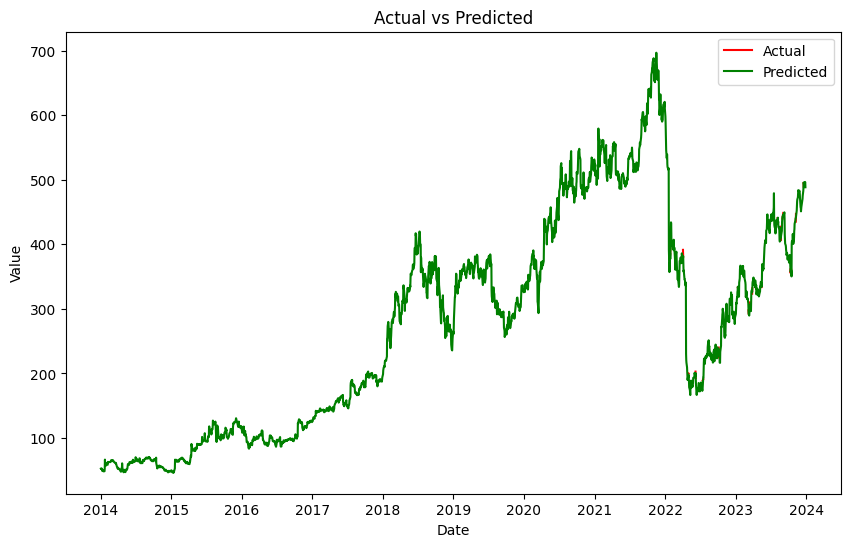

In [ ]:
# Convert them to pandas Series with the same index
y_test_series = pd.Series(y_test, index=df.index[-len(y_test):]) #etong part na toh di
predicted_series = pd.Series(predicted, index=df.index[-len(predicted):])

# Plot the graph created by linear regression
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(y_test_series, label="Actual", color='red')
plt.plot(predicted_series, label="Predicted", color='green')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

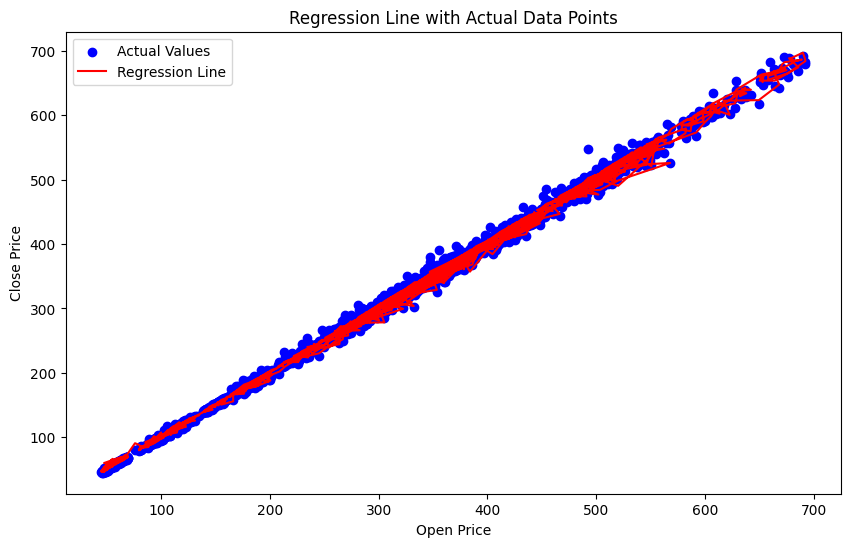

In [ ]:
# Plotting the regression line against the 'open' feature
plt.figure(figsize=(10, 6))
plt.scatter(x['open'], y, color="blue", label="Actual Values")  # Scatter plot of actual values
plt.plot(x['open'], LR.predict(x), color="red", label="Regression Line")  # Regression line
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Regression Line with Actual Data Points")
plt.legend()
plt.show()

## **Creating Random Forest Regressor Model to predict Close Variable**

In [ ]:
# Create the model random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV to tune RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of trees in the forest. Testing 50, 100, and 200 trees.
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree. 'None' means nodes are expanded until all leaves are pure or contain less than min_samples_split samples.
                                      # Testing no limit (None), and max depths of 10, 20, and 30.
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node. Testing splits when there are at least 2, 5, or 10 samples.
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node. Testing leaves with at least 1, 2, or 4 samples.
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees. 'True' means bootstrap samples are used, 'False' means the entire dataset is used to build each tree.
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

In [ ]:
# Initialize GridSearchCV with cross validation of 5 folds,
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
print("Best Parameters found: ", best_params)

# Make predictions with the best model
y_pred = best_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Best Parameters: {mse}')

Best Parameters found:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error with Best Parameters: 22.462142624706726


In [ ]:
# printing the predicted value
RF_predicted = best_model.predict(x_test)
print(x_test)
print(RF_predicted)
print(RF_predicted.shape)

                  open    volume         low
date                                        
2017-05-04  155.589996   5582300  154.550003
2019-01-10  314.570007  13472500  312.500000
2016-04-15  110.639999  11746100  109.779999
2017-10-02  182.110001   7342000  176.580002
2023-01-17  331.079987   9247000  323.600006
...                ...       ...         ...
2021-01-04  539.000000   4444400  515.090027
2014-10-09   66.661430  14928200   65.651428
2014-10-02   62.700001  18450600   62.554287
2023-05-30  397.480011  10865000  385.790009
2016-11-25  117.639999   1616300  117.180000

[504 rows x 3 columns]
[157.10596688 320.54775684 112.65734141 180.98477855 328.68468877
 178.42564336 187.57187424 488.80836271 304.51886255 401.5335484
  81.17381819 222.37689692  60.23703381 104.89341229 100.95845561
  67.62593233 502.10734014  95.13624332 486.46965816 362.49759512
 307.13712798 511.43024664 403.01583754 369.14808449 100.69756909
 154.49374213  60.21700111  93.69846561 366.7190518  261.52748

In [ ]:
# Calculating the accuracy of the model
print("Model Accuracy:", best_model.score(x_test, y_test))

Model Accuracy: 0.9991797770860794


In [ ]:
frame = pd.DataFrame({'Actual Value': y_test, "Predicted": RF_predicted})
print(frame)

            Actual Value   Predicted
date                                
2017-05-04    157.250000  157.105967
2019-01-10    324.660004  320.547757
2016-04-15    111.510002  112.657341
2017-10-02    177.009995  180.984779
2023-01-17    326.220001  328.684689
...                  ...         ...
2021-01-04    522.859985  522.969428
2014-10-09     65.945717   66.314185
2014-10-02     64.282860   63.221756
2023-05-30    392.980011  392.368540
2016-11-25    117.410004  117.715978

[504 rows x 2 columns]


In [ ]:
best_model.score(x_train, y_train)

0.9998039289394327

In [ ]:
best_model.score(x_test, y_test)


0.9991797770860794

In [ ]:
from sklearn import metrics
import math
# Mean Error indicates whether the model needs more adjustment of input, avoid overfitting, more inputs does not mean better result
print("Mean Absolute Error", metrics.mean_absolute_error(y_test, RF_predicted))
print("Mean Square Error", metrics.mean_squared_error(y_test, RF_predicted))
print("Root Mean Error", math.sqrt(metrics.mean_squared_error(y_test, RF_predicted)))
print("R-squared", metrics.r2_score(y_test, RF_predicted))


Mean Absolute Error 2.840381685339293
Mean Square Error 22.462142624706726
Root Mean Error 4.739424292538781
R-squared 0.9991797770860794


In [ ]:
# Showing the predicted results and that will be passed on plotting later
predicted = best_model.predict(x)
print(predicted)
print(predicted.shape)

[ 51.71174666  52.22434598  51.47121786 ... 492.50369979 491.96715958
 487.42410111]
(2516,)


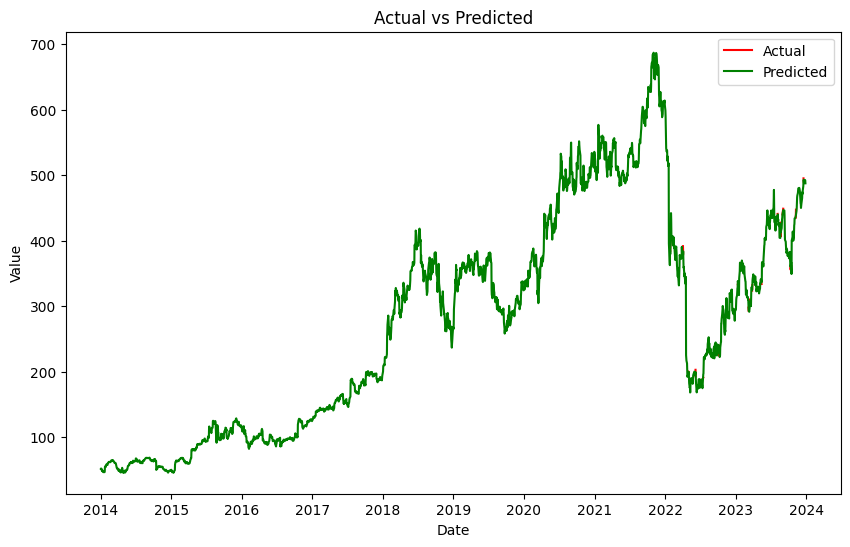

In [ ]:
# Convert them to pandas Series with the same index
y_test_series = pd.Series(y_test, index=df.index[-len(y_test):]) #etong part na toh di
predicted_series = pd.Series(predicted, index=df.index[-len(predicted):])

# Plot the graph created by linear regression
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(y_test_series, label="Actual", color='red')
plt.plot(predicted_series, label="Predicted", color='green')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

## **Creating Ensemble Model of the Two to Predict Close Variable**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Define Base Models and the Meta-Model
base_models = [
    ('linear_regression', LinearRegression()),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=0))
]

# Define the meta-model (a simple linear regression in this case)
meta_model = LinearRegression()

# Create the Stacking Regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

In [ ]:
# Train the Ensemble Model
stacked_model.fit(x_train, y_train)

StackingRegressor(estimators=[('linear_regression', LinearRegression()),
                              ('random_forest',
                               RandomForestRegressor(random_state=0))],
                  final_estimator=LinearRegression())

In [ ]:
# Showing the predicted results and that will be passed on plotting later
stacked_predicted = stacked_model.predict(x_test)
print(stacked_predicted)
print(stacked_predicted.shape)

[156.57383755 318.95221897 111.97223228 179.10518062 328.35244427
 176.74776268 186.25572724 489.39177353 299.60308934 403.03752702
  81.57524375 220.12285645  61.10817772 104.26961722 100.59280307
  71.71183482 504.82399291  95.19850062 486.05419091 361.9706873
 304.44231521 513.50190653 405.59932304 366.75633505 100.32745806
 155.0585616   61.11697353  93.5505313  368.59807984 259.18251314
 187.47299728 419.01792564  62.40533478 246.91415319 353.01770663
 273.39071434 100.61276443 318.63832881 122.83390633 368.34828541
  80.29929182 117.17274749 255.50266327 342.46049915 473.76598851
 464.37186868 337.10540005  63.86552898 180.99121501 374.32821904
 427.86204936 498.0451095  261.5900068  281.04389969 221.00073225
  93.12958891 179.44181767 171.27316699 481.53812892 118.28287832
 433.11504846 380.11899933 405.16198715 199.0386229   63.98859399
 557.90003881 200.31406907 122.92245882 463.48027168 365.11889728
 446.86258104 326.0919256  373.97453789  54.80982614 400.32347449
 534.150689

In [ ]:
# Mean Error indicates whether the model needs more adjustment of input, avoid overfitting, more inputs does not mean better result
print("Mean Absolute Error", metrics.mean_absolute_error(y_test, stacked_predicted))
print("Mean Square Error", metrics.mean_squared_error(y_test, stacked_predicted))
print("Root Mean Error", math.sqrt(metrics.mean_squared_error(y_test, stacked_predicted)))
print("R-squared", metrics.r2_score(y_test, stacked_predicted))


Mean Absolute Error 2.6307498758582524
Mean Square Error 20.05602299933612
Root Mean Error 4.478395136579187
R-squared 0.9992676384483429


In [ ]:
# Calculating the accuracy of the model
print("Model Accuracy:", stacked_model.score(x_test, y_test))

Model Accuracy: 0.9992676384483429


In [ ]:
frame = pd.DataFrame({'Actual Value': y_test, "Predicted": stacked_predicted})
print(frame)

            Actual Value   Predicted
date                                
2017-05-04    157.250000  156.573838
2019-01-10    324.660004  318.952219
2016-04-15    111.510002  111.972232
2017-10-02    177.009995  179.105181
2023-01-17    326.220001  328.352444
...                  ...         ...
2021-01-04    522.859985  521.086760
2014-10-09     65.945717   66.996003
2014-10-02     64.282860   64.320149
2023-05-30    392.980011  391.598508
2016-11-25    117.410004  117.743455

[504 rows x 2 columns]


In [ ]:
# Showing the predicted results and that will be passed on plotting later
stacked_predicted = stacked_model.predict(x)
print(stacked_predicted)
print(stacked_predicted.shape)

[ 52.30734941  52.52429038  51.70255535 ... 495.76946402 495.22975688
 488.39010644]
(2516,)


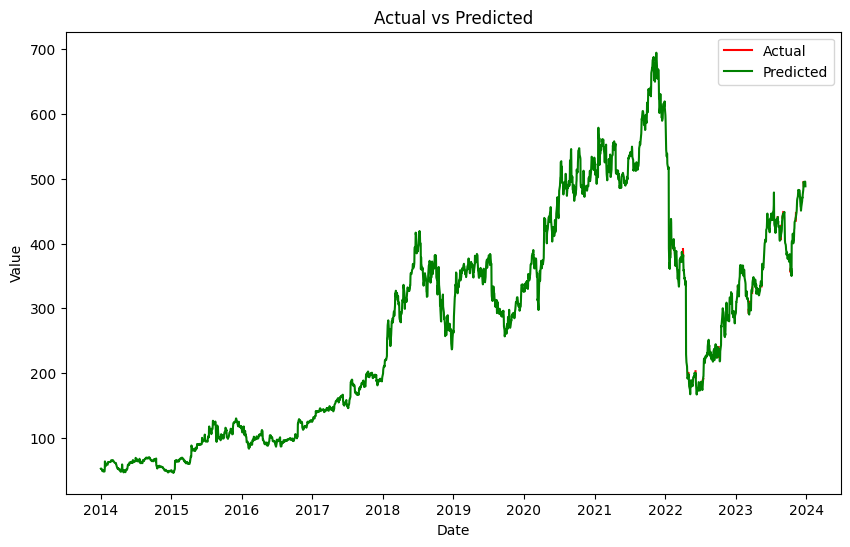

In [ ]:
# Convert them to pandas Series with the same index
y_test_series = pd.Series(y_test, index=df.index[-len(y_test):]) #etong part na toh di
predicted_series = pd.Series(stacked_predicted, index=df.index[-len(stacked_predicted):])

# Plot the graph created by linear regression
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(y_test_series, label="Actual", color='red')
plt.plot(predicted_series, label="Predicted", color='green')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()